# DTSC 5501 - Group Project #1

# Imports

In [32]:
import sys
sys.path.append("src/")
from LinkedList import LinkedList
from Event import Event
from ArrayList import ArrayList
from GenerateData import create_event_dataset
import matplotlib.pyplot as plt
import random
import time
import pandas as pd

## Part A

To begin, we will initialize a test event, the Array-Based List, and the Linked List.

In [2]:
test_event = Event(1, "Meeting", "2023-10-01", "10:00", "11:00", "Conference Room")
next_event = Event(2, "Class", "2025-10-01", "11:15", "12:00", "KOBL 231")
early_event = Event(4, "Conversation", "2024-10-01", "11:05", "11:14", "Virtual")


events = [test_event, next_event, early_event]

ll = LinkedList()
arr = ArrayList()


We can insert events into both lists by calling their respective `.insert()` methods. Further, we can call the `.list_all()` method to print the contents of both lists.

In [3]:
for event in events:
    ll.insert(event)
    arr.insert(event)

print("Linked List Contents\n")
ll.list_all()

print("\n\n\nArray-based List Contents\n")
arr.list_all()

Linked List Contents


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


We can delete items from both lists by calling their respetive `.delete()` methods. The function requires a idx argument, which dictates which event is to be removed. Calling `.delete(0)` removes the item at index 0 from each list. To demonstrate, let's delete event at index 1 from the array and event at index 0 from the linked list. 

In [4]:
ll.delete(0)
arr.delete(1)

print("Linked List Contents After Deletion of Event 0\n")
ll.list_all()

print("\n\n\nArray-based List Contents After Deletion of Event 1\n")
arr.list_all()

Linked List Contents After Deletion of Event 0


        Events shown below:
        
        -----------------------------------
        
        2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents After Deletion of Event 1


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


Let's add back both events. We can search through each list by calling the `.search_by_id()` method. This function requires both an id and a method argument. Id corresponds to the specific item that we want to find. Method corresponds to the search algorithm we want to use. This can be either 'linear' or 'binary'. 

Note: Prior to executing binary search, both lists are sorted. 

In [5]:
ll.insert(test_event, 0)
arr.insert(next_event, 1)
print("Linked List Contents After Re-inserting Event 0\n")
ll.list_all()
print("\n\n\nArray-based List Contents After Re-inserting Event 1\n")
arr.list_all()

Linked List Contents After Re-inserting Event 0


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	



Array-based List Contents After Re-inserting Event 1


        Events shown below:
        
        -----------------------------------
        
        1: Meeting on 2023-10-01 from 10:00 to 11:00 at Conference Room

	-----------------------------------

	2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231

	-----------------------------------

	4: Conversation on 2024-10-01 from 11:05 to 11:14 at Virtual

	-----------------------------------

	


In [6]:
lin_item = ll.search_by_id(2, 'linear')
print(f"\n\nLinked List Linear Search Result for Event 2: {lin_item}\n")

Event 2 found in 2 attempts (0.0000 seconds)


Linked List Linear Search Result for Event 2: 2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231



In [7]:
bin_item = arr.search_by_id(2, 'binary')
print(f"\n\nArray-based List Binary Search Result for Event 2: {bin_item}\n")

Event 2 found in 1 attempts (3.0994415283203125e-06 seconds) 


Array-based List Binary Search Result for Event 2: 2: Class on 2025-10-01 from 11:15 to 12:00 at KOBL 231



If a user accidentally provides an invalid search method. The function returns with an error and instructs the user on what the valid args are.

In [8]:
invalid_search_item = arr.search_by_id(2, 'random')
print(f"\n\nArray-based List Random Search Result for Event 2: {invalid_search_item}\n")

ERROR: Invalid search method
Acceptable values: [linear, binary]


Array-based List Random Search Result for Event 2: None



If the user searches for an item that doesn't exist. The function returns an error indicating that the event was not found. 

In [9]:
fake_item = arr.search_by_id(13, 'binary')
print(f"\n\nArray-based List Binary Search Result for Fake Event 13: {fake_item}\n")

ERROR: Event not found


Array-based List Binary Search Result for Fake Event 13: None



## Part B

In [ ]:
tests = [50, 500, 5000, 50000]
methods = ["merge", "quick", "insertion"]
arr_results = {m: [] for m in methods}
ll_results = {m: [] for m in methods}

The code below runs each sorting algorithm for each type of list (ArrayList and LinkedList). The values are recorded in a dictionary.

In [18]:

for test in tests:
    arrs = create_event_dataset(test, "array")
    lls = create_event_dataset(test, "ll")
    for method in methods:
        start = time.time()
        arrs.sort_list(by="id", method=method)
        end = time.time()
        arr_results[method].append(end - start)
        
        start = time.time()
        lls.sort_list(by="id", method=method)
        end = time.time()
        ll_results[method].append(end - start)
        

Below is a plot visualizing the sorting performance on the array list. It can be seen that the insertion sort performed significantly worse than the other sorting algorithms. Note that the yaxis is on a log scale. 

Another consideration is that our insertion sort implementation modified the list in place, whereas the others returned a new instance of an ArrayList that was sorted. 

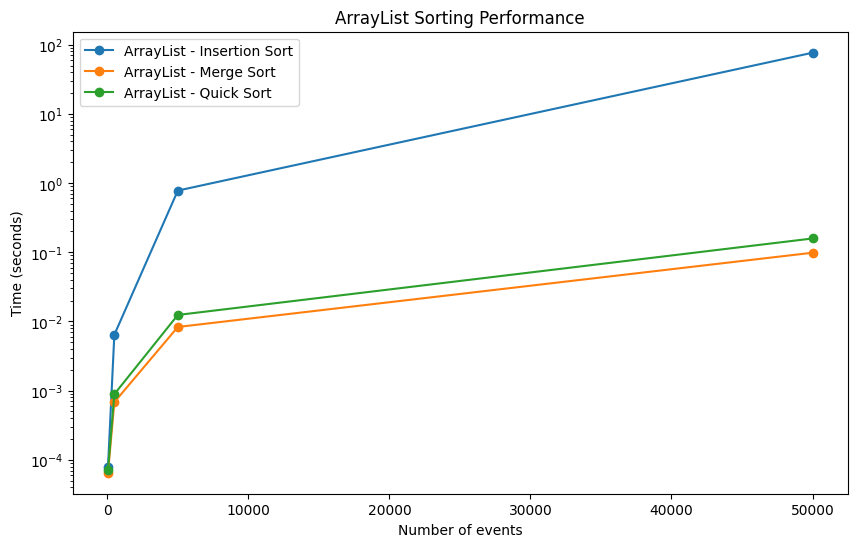

In [26]:
plt.figure(figsize=(10, 6))

for method, times in arr_results.items():
    plt.plot(tests, times, marker='o', label=f'ArrayList - {method.capitalize()} Sort')

plt.xlabel("Number of events")
plt.ylabel("Time (seconds)")
plt.title("ArrayList Sorting Performance")
plt.legend()
plt.yscale('log')

The plot below shows the results of the experiment for the Linked List. Each algorithm performed similarly, with quick sort slightly performing the worst and Insertion sort performing the best. 

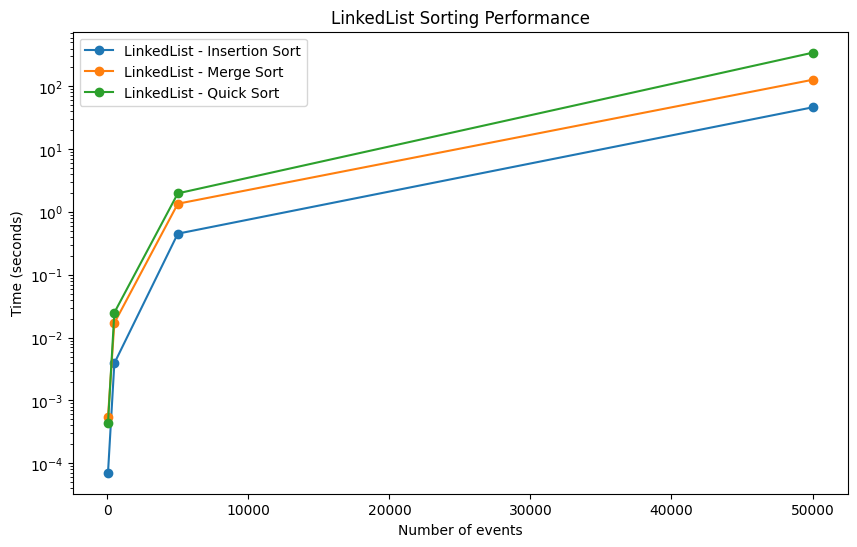

In [30]:
plt.figure(figsize=(10, 6))

for method, times in ll_results.items():
    plt.plot(tests, times, marker='o', label=f'LinkedList - {method.capitalize()} Sort')

plt.xlabel("Number of events")
plt.ylabel("Time (seconds)")
plt.title("LinkedList Sorting Performance")
plt.legend()
plt.yscale('log')

The code below displays a table with sorting times for each algorithm and class. Note that sorting the array list was generally more efficient than sorting the linked list. This may be due to the additional memory overhead associated with the linked list. 

In [33]:
results_df = pd.DataFrame({
    "ArrayList_Merge": arr_results["merge"],
    "ArrayList_Quick": arr_results["quick"],
    "ArrayList_Insertion": arr_results["insertion"],
    "LinkedList_Merge": ll_results["merge"],
    "LinkedList_Quick": ll_results["quick"],
    "LinkedList_Insertion": ll_results["insertion"],
}, index=tests)
results_df

,ArrayList_Merge,ArrayList_Quick,ArrayList_Insertion,LinkedList_Merge,LinkedList_Quick,LinkedList_Insertion
50,0.000065,0.000071,0.000079,0.000548,0.000435,0.000071
500,0.000681,0.000890,0.006430,0.017107,0.025037,0.003915
5000,0.008327,0.012422,0.779949,1.355914,1.982653,0.452509
50000,0.098605,0.158404,76.719362,127.378363,343.551531,46.399254


## Part C

### Search by ID

#### Linear Search

In [10]:
# Sample dataset of events
n=10000
events_a = create_event_dataset(n, "array")
events_l = create_event_dataset(n, "ll")

random.seed(93)
id_to_search = random.randint(1,n)

##### Array-based List

In [11]:
# Searching unsorted data
test_search = events_a.search_by_id(id_to_search, "linear")

Event 8100 found in 4922 attempts (0.0003190040588378906 seconds)


In [12]:
# Searching sorted data
sorted_events_a = events_a.sort_list(by="id", method="merge")
test_search = sorted_events_a.search_by_id(id_to_search, "linear")

Event 8100 found in 8100 attempts (0.0003120899200439453 seconds)


In certain cases where the `id_to_search` is indexed lower in an unsorted array list than in a sorted array list, searching the unsorted data is more efficient. This is not to be expected in all cases and it is probably wiser in the long run to sort before searching.

##### Singly-linked List

In [13]:
# Searching unsorted data
test_search = events_l.search_by_id(id_to_search, "linear")

Event 8100 found in 3637 attempts (0.0005 seconds)


In [14]:
# Searching sorted data
sorted_events_l = events_l.sort_list(by="id", method="merge")
test_search = sorted_events_l.search_by_id(id_to_search, "linear")

Event 8100 found in 8100 attempts (0.0004 seconds)


Despite the sorted approach taking more attempts, this method of searching sorted data ultimately took less time than searching the unsorted data in fewer attempts.

#### Binary Search

##### Array-based List

Binary Search only works on sorted datasets so we will only explore this search method on sorted data

In [15]:
# Searching sorted data
sorted_events_a = events_a.sort_list(by="id", method="merge")
test_search = sorted_events_a.search_by_id(id_to_search, "binary")

Event 8100 found in 11 attempts (2.6226043701171875e-06 seconds) 


##### Singly-linked List

Binary Search only works on sorted datasets so we will only explore this search method on sorted data

In [16]:
# Searching sorted data
sorted_events_l = events_l.sort_list(by="id", method="merge")
test_search = sorted_events_l.search_by_id(id_to_search, "binary")

Event 8100 found in 11 attempts (0.0035 seconds)


The binary search algorithm for a singly-linked list is less efficient than for an array-based list. This is due to needing to traverse the list with `.next` to get to new indices, rather than accessing directly like with an array-based list.

### Conflict Detection

#### Array-based List

##### Complexity
The algorithm for conflict detection on array-based lists begins by merge sorting events by date; this method has time complexity of $O(n log(n))$

The nested loop over events has time complexity $O(n^2)$ in the worst case. However, since the loop breaks when dates do not match, actual complexity will be lower. In the best case where all events are on a different date, complexity would be $O(n)$. In the average case, complexity will be close to $O(n\cdot k)$ where $k$ is the average number of events per day. Since `create_event_dataset` spreads events over 4 years, $k = \frac{n}{4 \cdot 365} = \frac{n}{1460}$ events/day.

Therefore, `detect_conflicts()` has overall complexity (average case) of $O(n\cdot log(n) + n\cdot \frac{n}{1460})$

In the worst case, complexity is $O(n\cdot log(n) + n^2) \Rightarrow O(n^2)$

##### Optimizations
We optimized this method by sorting events by date before checking for conflicts. This reduces the number of checks required by quickly eliminating events on different dates.

In [17]:
arr = ArrayList()
# Add conflicting events
arr.insert(Event(11, "Meeting A", "2025-10-14", "09:00", "10:00", "Room 1")) # conflicts with 2
arr.insert(Event(12, "Meeting B", "2025-10-14", "09:30", "10:30", "Room 2")) # conflicts with 1,3,4
arr.insert(Event(13, "Meeting C", "2025-10-14", "10:15", "11:00", "Room 3")) # conflicts with 2,4
arr.insert(Event(14, "Meeting D", "2025-10-14", "10:00", "10:30", "Room 4")) # conflicts with 2,3,4
arr.insert(Event(15, "Meeting E", "2025-10-15", "09:00", "10:00", "Room 5")) # no conflict (different day)

# Test for conflicts
conflicts = arr.detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

4 conflicts identified in 2.47955322265625e-05 seconds
- Meeting A conflicts with Meeting B on 2025-10-14
- Meeting B conflicts with Meeting C on 2025-10-14
- Meeting B conflicts with Meeting D on 2025-10-14
- Meeting C conflicts with Meeting D on 2025-10-14


In [18]:
# Test on 10,000 events
events = create_event_dataset(10000, "array")
# Test for conflicts
conflicts = events.detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

5806 conflicts identified in 0.05636000633239746 seconds
- Event MLW conflicts with Event CRG on 2025-08-02
- Event CUY conflicts with Event EOJ on 2025-08-03
- Event KEO conflicts with Event EOJ on 2025-08-03
- Event HGV conflicts with Event EOJ on 2025-08-03
- Event EOJ conflicts with Event IKZ on 2025-08-03
- Event AII conflicts with Event DKS on 2025-08-03
- Event DKS conflicts with Event LTM on 2025-08-03
- Event DKS conflicts with Event VA on 2025-08-03
- Event IKU conflicts with Event LWD on 2025-08-04
- Event FKQ conflicts with Event FEK on 2025-08-04
- Event ZA conflicts with Event FKX on 2025-08-06
- Event ZA conflicts with Event CPC on 2025-08-06
- Event ZA conflicts with Event BOW on 2025-08-06
- Event FKX conflicts with Event BOW on 2025-08-06
- Event CPC conflicts with Event BI on 2025-08-06
- Event CPC conflicts with Event FIJ on 2025-08-06
- Event BI conflicts with Event FIJ on 2025-08-06
- Event ERT conflicts with Event AND on 2025-08-07
- Event FTM conflicts with Even

#### Singly-linked List

##### Complexity

Before optimization, time complexity was $O(n^2)$

After optimization, time complexity is $O(n + m^2)$ where $m$ is events per date. In the case of 10,000 events spread over 4 years (this is what `create_event_dataset` produces), we should only average $m \approx 7$ events per day. This adds negligible complexity for n=10,000.

##### Optimizations

I needed to optimize the base conflict-detection algorithm for Array-based lists to run efficiently on Singly-linked lists with up to 10,000 nodes. Prior to optimization,  `_detect_conflicts()` took approximately 30 seconds to run on 10,000 events. After optimization, runtime is down to fractions of a second. This was achieved by initially grouping events by date. This reduces the number of comparisons required: instead of comparing every event against every other, we only compare events on the same day.

In [19]:
ll = LinkedList()
# Add conflicting events
ll.insert(Event(11, "Meeting A", "2025-10-14", "09:00", "10:00", "Room 1")) # conflicts with 12
ll.insert(Event(15, "Meeting E", "2025-10-15", "09:00", "10:00", "Room 5")) # no conflict (different day)
ll.insert(Event(12, "Meeting B", "2025-10-14", "09:30", "10:30", "Room 2")) # conflicts with 11,13,14
ll.insert(Event(13, "Meeting C", "2025-10-14", "10:15", "11:00", "Room 3")) # conflicts with 12,14
ll.insert(Event(14, "Meeting D", "2025-10-14", "10:00", "10:30", "Room 4")) # conflicts with 12,13,14

# Test for conflicts
conflicts = ll._detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

4 conflicts detected in 1.71661376953125e-05 seconds
- Meeting A conflicts with Meeting B on 2025-10-14
- Meeting B conflicts with Meeting C on 2025-10-14
- Meeting B conflicts with Meeting D on 2025-10-14
- Meeting C conflicts with Meeting D on 2025-10-14


In [20]:
# Test on 10,000 events
events = create_event_dataset(10000, "ll")
# Test for conflicts
conflicts = events._detect_conflicts()
if conflicts:
    for e1, e2 in conflicts:
        print(f"- {e1.title} conflicts with {e2.title} on {e1.date}")
else:
    print("No conflicts detected")

5810 conflicts detected in 0.02828693389892578 seconds
- Event CRS conflicts with Event DIJ on 2027-08-11
- Event KWX conflicts with Event DVY on 2027-03-19
- Event APE conflicts with Event CXU on 2027-03-19
- Event IMG conflicts with Event FZW on 2027-03-19
- Event IMG conflicts with Event DFK on 2027-03-19
- Event ADW conflicts with Event JQX on 2027-12-06
- Event ADW conflicts with Event FZA on 2027-12-06
- Event KKQ conflicts with Event FKL on 2027-12-06
- Event KYZ conflicts with Event FKL on 2027-12-06
- Event JQX conflicts with Event FZA on 2027-12-06
- Event AMR conflicts with Event HXF on 2028-06-05
- Event AMR conflicts with Event FET on 2028-06-05
- Event AMR conflicts with Event JJD on 2028-06-05
- Event IOJ conflicts with Event KAV on 2028-06-05
- Event IOJ conflicts with Event UV on 2028-06-05
- Event IOJ conflicts with Event ETT on 2028-06-05
- Event FET conflicts with Event JJD on 2028-06-05
- Event UV conflicts with Event ETT on 2028-06-05
- Event IZV conflicts with Ev

## Part D

## Part E

Please see README.md